In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm import tqdm
from IPython.display import clear_output

In [2]:
df = pd.read_csv("train/train.csv")

In [3]:
df.shape

(3589918, 42)

In [5]:
df.sample(100000).to_csv('train_zip.csv')

In [2]:
df = pd.read_csv("train_zip.csv")

In [17]:
df.shape

(100000, 33)

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#df.drop(['client_id', 'npo_account_id'], axis=1, inplace=True)

In [4]:
df.drop(['client_id'], axis=1, inplace=True)

In [6]:
df.drop('slctn_nmbr', axis=1, inplace=True)

In [7]:
df.head()

,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
0,0xB492A0893AF5C042A81AB98FFBF96B1D,2,1,2015,2015Q2,-1,41,3492,3470,35,...,-1,-1,-1,398017.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,0
1,0x30405A5ED70D134DBACEA479F4CA1E4A,1,2,2015,2015Q4,-1,39,1191,244,947,...,1,-1,-1,141006.0,МОСКОВСКАЯ ОБЛ,1,-1,0,0,0
2,0x810C005056AB57EC11EBA287AC552DD7,2,1,2022,2022Q2,1,47,801,778,31,...,1,-1,-1,162626.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,1,0
3,0x3225ED4DFFCD4042BB36FE353B42ACBD,1,2,2020,2020Q4,1,48,7875,0,5844,...,-1,-1,-1,398036.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,0,0
4,0x58998F4E17293D49953B9943F2B794E3,1,2,2012,2012Q4,1,38,3452,0,2557,...,-1,-1,-1,162609.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,0


In [14]:
df.describe()

,slctn_nmbr,npo_accnts_nmbr,pmnts_type,year,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,...,email,lk,assignee_npo,assignee_ops,postal_code,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,...,100000.000000,100000.000000,100000.000000,100000.000000,97237.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000
mean,0.67858,1.345060,1.808390,2013.544210,0.149140,45.119880,2408.765550,1192.066540,842.300110,7.540576e+04,...,-0.202130,-0.435500,-0.995920,-0.994840,378810.514855,0.54112,0.45630,0.003270,0.496580,0.016210
std,0.87770,0.620578,0.756942,6.196133,0.988821,12.461406,2056.707045,1538.025744,1621.634635,3.974070e+05,...,0.402759,0.900193,0.090241,0.101457,186779.915888,0.84095,0.88983,0.057091,0.499991,0.126283
min,0.00000,1.000000,0.000000,1993.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.810257e+04,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.00000,-1.00000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,1.000000,2009.000000,-1.000000,36.000000,760.000000,91.000000,30.000000,1.888037e+03,...,0.000000,-1.000000,-1.000000,-1.000000,162713.000000,1.00000,-1.00000,0.000000,0.000000,0.000000
50%,0.00000,1.000000,2.000000,2015.000000,1.000000,46.000000,1856.000000,580.000000,33.000000,1.497960e+04,...,0.000000,-1.000000,-1.000000,-1.000000,398046.000000,1.00000,1.00000,0.000000,0.000000,0.000000
75%,1.00000,2.000000,2.000000,2019.000000,1.000000,53.000000,3513.000000,1732.000000,811.000000,6.093940e+04,...,0.000000,1.000000,-1.000000,-1.000000,460050.000000,1.00000,1.00000,0.000000,1.000000,0.000000
max,3.00000,16.000000,3.000000,2023.000000,1.000000,120.000000,44924.000000,10013.000000,9329.000000,7.809994e+07,...,1.000000,1.000000,1.000000,1.000000,964490.000000,1.00000,1.00000,1.000000,1.000000,1.000000


In [8]:
df.isna().sum()

slctn_nmbr                    0
npo_accnts_nmbr               0
pmnts_type                    0
year                          0
quarter                       0
gender                        0
age                           0
clnt_cprtn_time_d             0
actv_prd_d                    0
lst_pmnt_rcnc_d               0
balance                       0
oprtn_sum_per_qrtr            0
oprtn_sum_per_year            0
frst_pmnt_date              894
lst_pmnt_date_per_qrtr    32279
frst_pmnt                     0
lst_pmnt                      0
pmnts_sum                     0
pmnts_nmbr                    0
pmnts_sum_per_qrtr            0
pmnts_sum_per_year            0
pmnts_nmbr_per_qrtr           0
pmnts_nmbr_per_year           0
incm_sum                      0
incm_per_qrtr                 0
incm_per_year                 0
mgd_accum_period              0
mgd_payment_period            0
phone_number                  0
email                         0
lk                            0
assignee

In [23]:
data = df.groupby('year').agg({'slctn_nmbr' : 'count'}).reset_index()

<Axes: xlabel='year', ylabel='slctn_nmbr'>

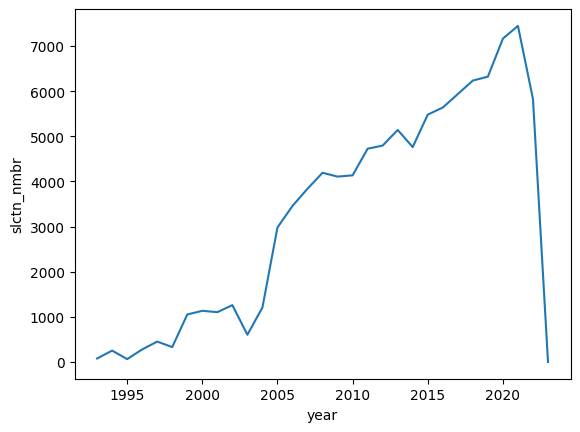

In [25]:
sns.lineplot(data, x='year', y='slctn_nmbr')

In [30]:
df.corr(numeric_only=True)

,slctn_nmbr,npo_accnts_nmbr,pmnts_type,year,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,...,email,lk,assignee_npo,assignee_ops,postal_code,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
slctn_nmbr,1.000000,-0.246717,-0.012233,-0.141601,-0.048813,-0.093384,0.205039,-0.068027,0.265643,-0.088605,...,-0.755587,-0.298672,0.009487,0.034572,-0.440211,-0.044186,-0.300227,-0.016743,-0.406892,-0.052868
npo_accnts_nmbr,-0.246717,1.000000,-0.141575,0.134815,0.026788,0.028039,-0.054205,0.119512,-0.204618,0.058951,...,0.218239,0.165965,0.009860,0.007616,0.114557,0.096463,0.158436,0.031659,0.234143,0.022925
pmnts_type,-0.012233,-0.141575,1.000000,0.043709,-0.017199,0.027681,-0.129602,-0.274374,0.129976,-0.072720,...,0.058387,-0.061398,-0.019884,-0.012648,0.015016,-0.073343,-0.132431,-0.013501,-0.083814,0.022974
year,-0.141601,0.134815,0.043709,1.000000,0.075701,0.223519,0.265452,0.397482,0.013624,0.145435,...,0.004140,0.347252,0.005043,0.005841,0.247811,0.183816,0.344939,0.030532,0.334995,0.001289
gender,-0.048813,0.026788,-0.017199,0.075701,1.000000,-0.065267,-0.013935,0.033759,-0.079212,0.036056,...,-0.025673,0.040343,-0.019371,-0.014848,0.011552,0.033621,0.118684,0.011024,0.116587,0.002022
age,-0.093384,0.028039,0.027681,0.223519,-0.065267,1.000000,0.299059,0.190366,0.190795,0.081470,...,0.141503,0.045301,-0.004063,-0.019504,-0.009959,-0.089398,-0.053070,0.002401,0.059375,-0.005683
clnt_cprtn_time_d,0.205039,-0.054205,-0.129602,0.265452,-0.013935,0.299059,1.000000,0.525721,0.576986,0.037072,...,-0.175176,-0.223243,0.009719,0.001198,-0.224642,-0.061269,-0.170229,-0.014437,-0.232220,-0.024734
actv_prd_d,-0.068027,0.119512,-0.274374,0.397482,0.033759,0.190366,0.525721,1.000000,-0.228165,0.151521,...,-0.026213,0.089564,0.021811,0.008867,-0.034001,0.117527,0.172969,0.014434,0.248996,0.004853
lst_pmnt_rcnc_d,0.265643,-0.204618,0.129976,0.013624,-0.079212,0.190795,0.576986,-0.228165,1.000000,-0.080736,...,-0.079537,-0.280333,-0.013388,-0.006960,-0.192303,-0.216691,-0.412741,-0.024881,-0.497146,-0.039760
balance,-0.088605,0.058951,-0.072720,0.145435,0.036056,0.081470,0.037072,0.151521,-0.080736,1.000000,...,0.066601,0.150670,-0.000094,-0.005855,0.047208,-0.009929,0.074267,0.014210,0.117962,0.009969


<Axes: >

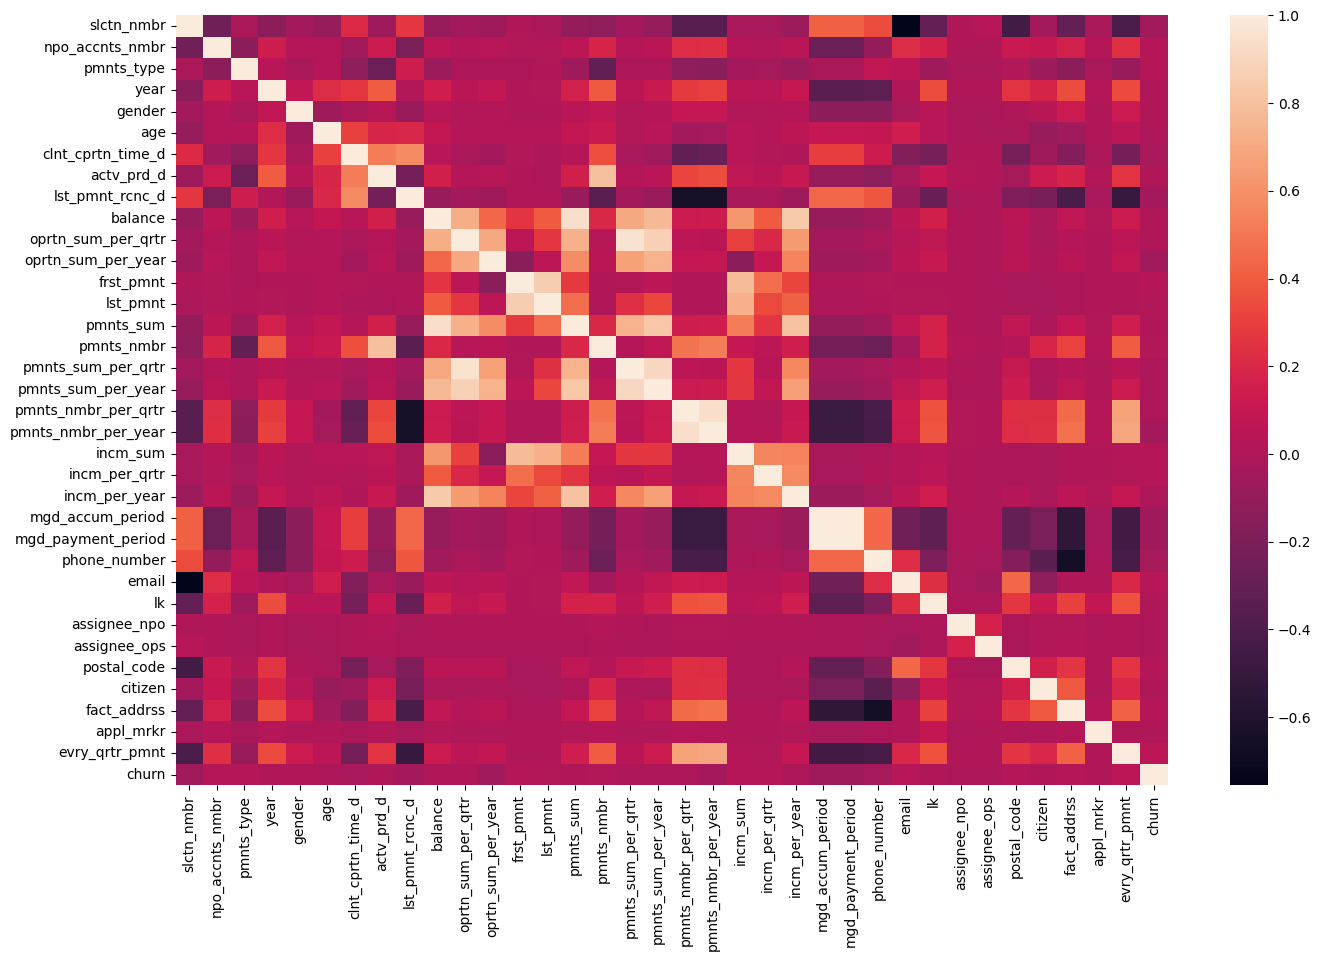

In [34]:
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.heatmap(df.corr(numeric_only=True))

In [6]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [8]:
df.drop(['mgd_accum_period'], axis=1, inplace=True)

In [9]:
df.drop(['pmnts_sum_per_qrtr', 'pmnts_sum_per_year'], axis=1, inplace=True)

In [10]:
df.drop(['pmnts_sum'], axis=1, inplace=True)

In [11]:
df.drop(['lst_pmnt', 'pmnts_nmbr_per_year'], axis=1, inplace=True)

In [12]:
df.drop(['postal_code'], axis=1, inplace=True)

In [11]:
numeric_columns = df.select_dtypes(exclude='object').columns

In [17]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
balance              incm_per_year          0.843249
actv_prd_d           pmnts_nmbr             0.794296
frst_pmnt            incm_sum               0.779924
slctn_nmbr           email                  0.755587
balance              oprtn_sum_per_qrtr     0.722666
oprtn_sum_per_qrtr   oprtn_sum_per_year     0.691831
pmnts_nmbr_per_qrtr  evry_qrtr_pmnt         0.672360
phone_number         fact_addrss            0.666293
lst_pmnt_rcnc_d      pmnts_nmbr_per_qrtr    0.643986
oprtn_sum_per_qrtr   incm_per_year          0.638438
dtype: float64


In [26]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold


cutter = VarianceThreshold()
cutter.fit(df[numeric_columns])

cutter.get_feature_names_out()

array(['slctn_nmbr', 'npo_accnts_nmbr', 'pmnts_type', 'year', 'gender',
       'age', 'clnt_cprtn_time_d', 'actv_prd_d', 'lst_pmnt_rcnc_d',
       'balance', 'oprtn_sum_per_qrtr', 'oprtn_sum_per_year', 'frst_pmnt',
       'pmnts_nmbr', 'pmnts_nmbr_per_qrtr', 'incm_sum', 'incm_per_qrtr',
       'incm_per_year', 'mgd_payment_period', 'phone_number', 'email',
       'lk', 'assignee_npo', 'assignee_ops', 'postal_code', 'citizen',
       'fact_addrss', 'appl_mrkr', 'evry_qrtr_pmnt', 'churn'],
      dtype=object)

In [27]:
cutter = VarianceThreshold()
cutter.fit(df[numeric_columns])

array(['slctn_nmbr', 'npo_accnts_nmbr', 'pmnts_type', 'year', 'gender',
       'age', 'clnt_cprtn_time_d', 'actv_prd_d', 'lst_pmnt_rcnc_d',
       'balance', 'oprtn_sum_per_qrtr', 'oprtn_sum_per_year', 'frst_pmnt',
       'pmnts_nmbr', 'pmnts_nmbr_per_qrtr', 'incm_sum', 'incm_per_qrtr',
       'incm_per_year', 'mgd_payment_period', 'phone_number', 'email',
       'lk', 'assignee_npo', 'assignee_ops', 'postal_code', 'citizen',
       'fact_addrss', 'appl_mrkr', 'evry_qrtr_pmnt', 'churn'],
      dtype=object)

In [38]:
df.shape

(100000, 33)

In [28]:
len(cutter.get_feature_names_out())

30

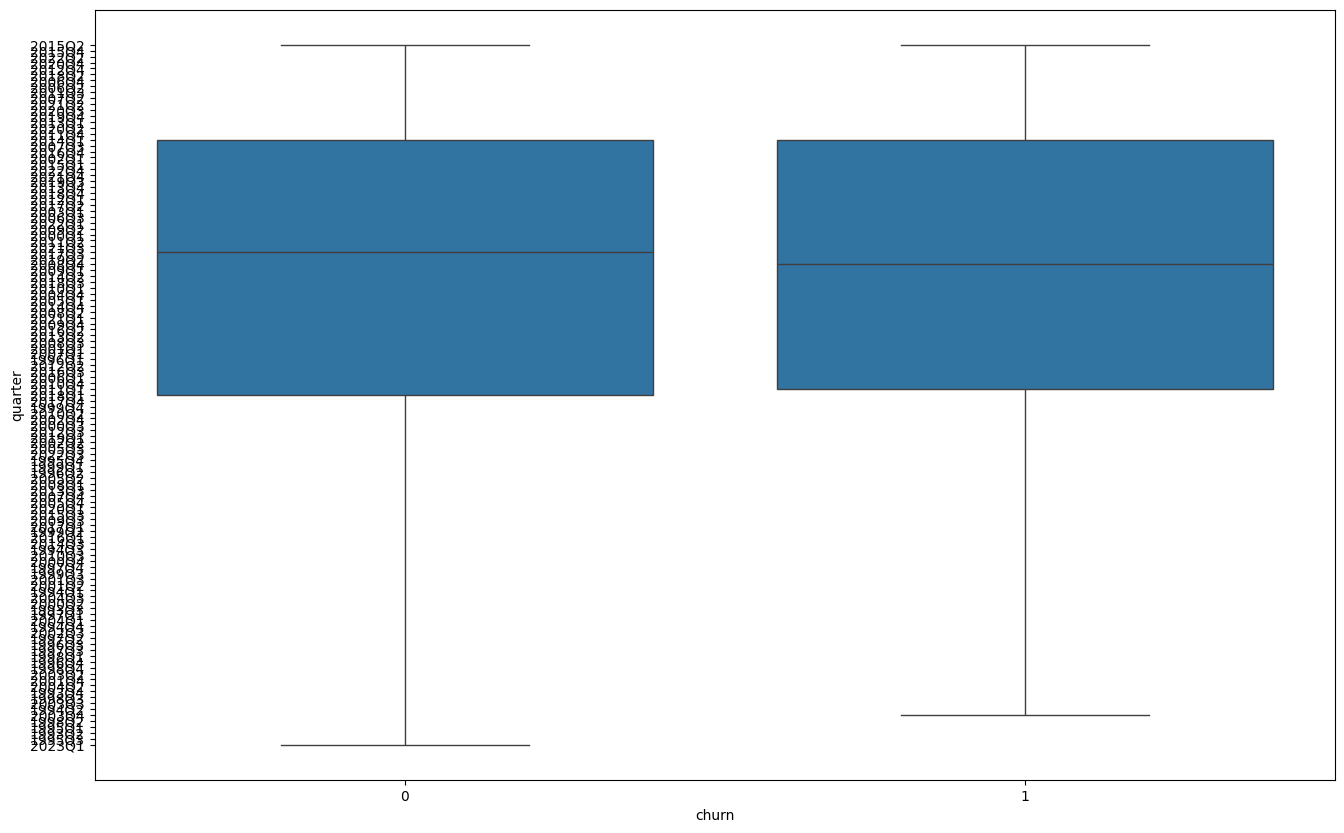

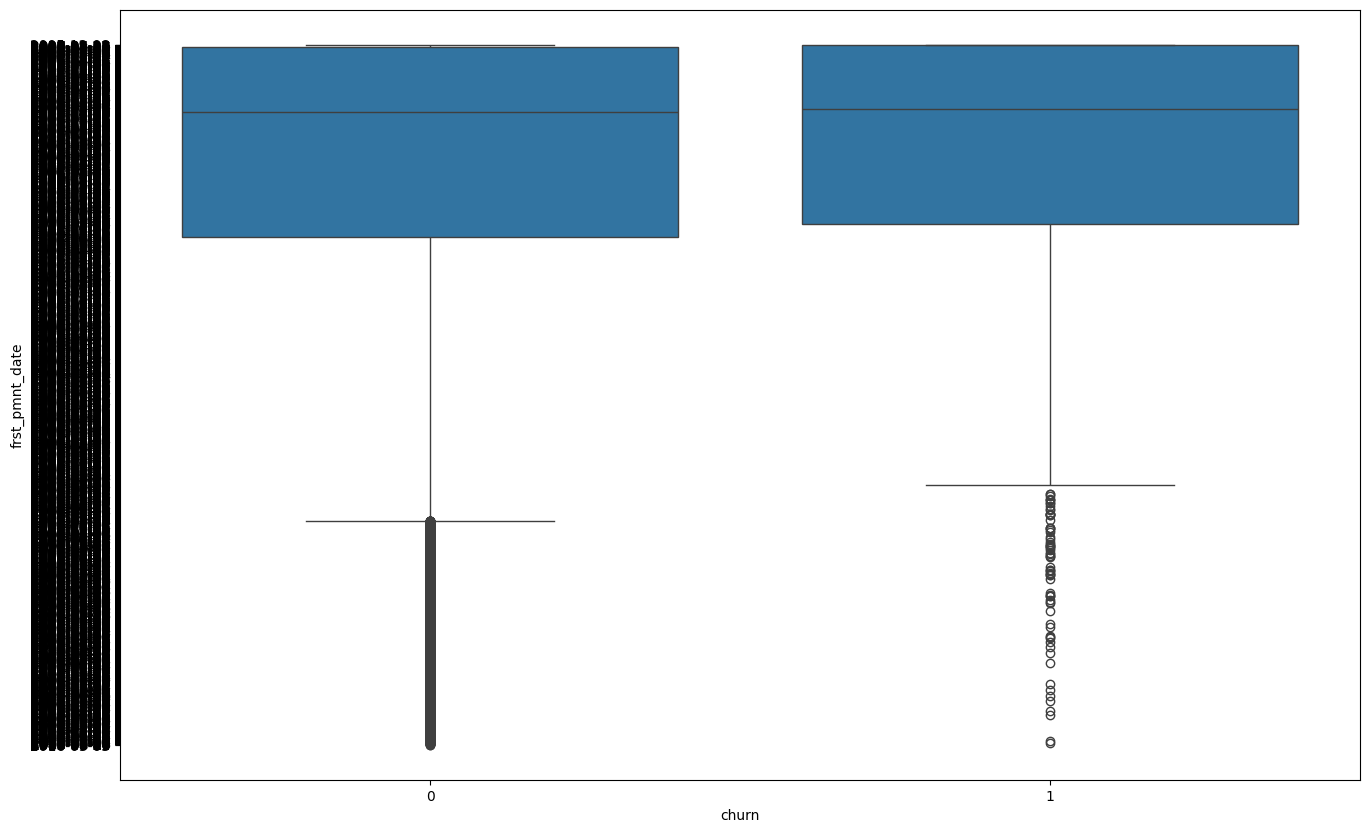

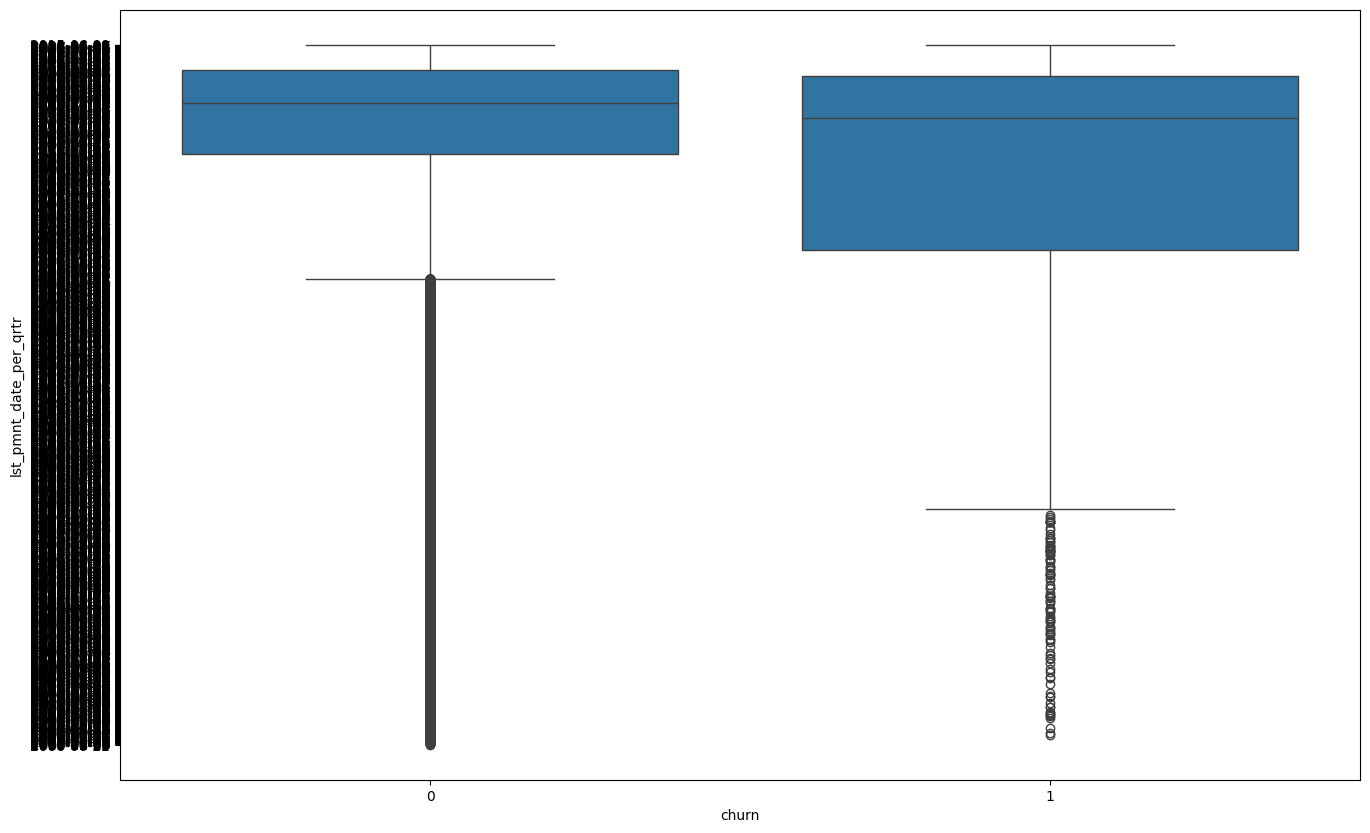

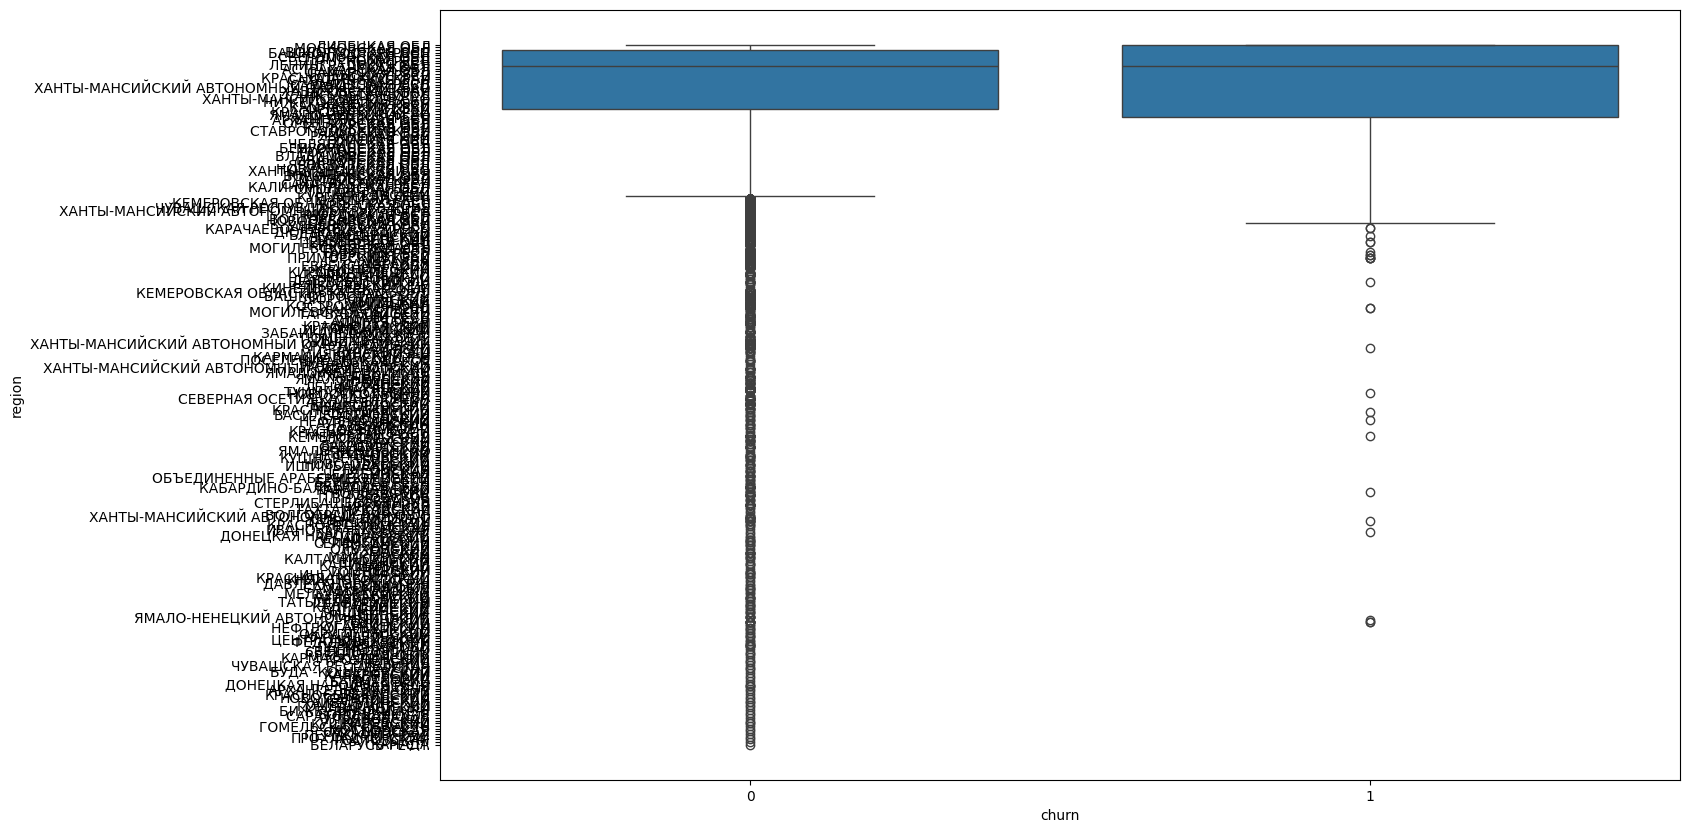

In [30]:
num_cols = df.select_dtypes('object').columns

for col in num_cols:
    
    fig = plt.figure()
    fig.set_size_inches(16, 10)
    
    sns.boxplot(y=col, x=df.churn.astype('category'), data=df)
    plt.show()

In [31]:
df.describe(include='object')

,quarter,frst_pmnt_date,lst_pmnt_date_per_qrtr,region
count,100000,99106,67721,96358
unique,119,4339,3043,264
top,2021Q4,2004-12-31,2004-12-31,ЛИПЕЦКАЯ ОБЛ
freq,3504,12008,628,16806


In [15]:
df.isna().sum()

slctn_nmbr                0
npo_accnts_nmbr           0
pmnts_type                0
year                      0
quarter                   0
gender                    0
age                       0
clnt_cprtn_time_d         0
actv_prd_d                0
lst_pmnt_rcnc_d           0
balance                   0
oprtn_sum_per_qrtr        0
oprtn_sum_per_year        0
frst_pmnt_date            0
lst_pmnt_date_per_qrtr    0
frst_pmnt                 0
pmnts_nmbr                0
pmnts_nmbr_per_qrtr       0
incm_sum                  0
incm_per_qrtr             0
incm_per_year             0
mgd_payment_period        0
phone_number              0
email                     0
lk                        0
assignee_npo              0
assignee_ops              0
region                    0
citizen                   0
fact_addrss               0
appl_mrkr                 0
evry_qrtr_pmnt            0
churn                     0
dtype: int64

In [48]:
df.region.value_counts()

region
ЛИПЕЦКАЯ ОБЛ               20448
ВОЛОГОДСКАЯ ОБЛ            15195
МОСКВА Г                    5379
САМАРСКАЯ ОБЛ               4908
БАШКОРТОСТАН РЕСП           4712
                           ...  
КИРОВО-ЧЕПЕЦКИЙ                1
СУЗЕМСКИЙ                      1
ОЛЬХОВСКИЙ                     1
ДОНЕЦКАЯ НАРОДНАЯ РЕСП.        1
БЕЛАРУСЬ РЕСП.                 1
Name: count, Length: 264, dtype: int64

In [13]:
df.region = df.region.fillna('ЛИПЕЦКАЯ ОБЛ')

In [53]:
df.frst_pmnt_date.sort_values(ascending=False)

60477    2022-12-14
52714    2022-12-14
30268    2022-12-14
22683    2022-12-14
13876    2022-12-14
            ...    
99644           NaN
99650           NaN
99850           NaN
99892           NaN
99950           NaN
Name: frst_pmnt_date, Length: 100000, dtype: object

In [54]:
df.lst_pmnt_date_per_qrtr.sort_values(ascending=False)

97799    2022-12-30
97759    2022-12-29
89707    2022-12-29
36212    2022-12-29
71962    2022-12-29
            ...    
99987           NaN
99991           NaN
99994           NaN
99995           NaN
99998           NaN
Name: lst_pmnt_date_per_qrtr, Length: 100000, dtype: object

In [64]:
df[df['frst_pmnt_date'].isna()].churn.value_counts(normalize=True)

churn
0    0.988814
1    0.011186
Name: proportion, dtype: float64

In [63]:
df[df['lst_pmnt_date_per_qrtr'].isna()].churn.value_counts(normalize=True)

churn
0    0.987329
1    0.012671
Name: proportion, dtype: float64

In [65]:
df.churn.value_counts(normalize=True)

churn
0    0.98379
1    0.01621
Name: proportion, dtype: float64

In [14]:
df.frst_pmnt_date = df.frst_pmnt_date.fillna('0')

In [15]:
df.lst_pmnt_date_per_qrtr = df.lst_pmnt_date_per_qrtr.fillna('0')

In [22]:
df.dtypes

slctn_nmbr                  int64
npo_accnts_nmbr             int64
pmnts_type                  int64
year                        int64
quarter                   float64
gender                      int64
age                         int64
clnt_cprtn_time_d           int64
actv_prd_d                  int64
lst_pmnt_rcnc_d             int64
balance                   float64
oprtn_sum_per_qrtr        float64
oprtn_sum_per_year        float64
frst_pmnt_date            float64
lst_pmnt_date_per_qrtr    float64
frst_pmnt                 float64
pmnts_nmbr                  int64
pmnts_nmbr_per_qrtr         int64
incm_sum                  float64
incm_per_qrtr             float64
incm_per_year             float64
mgd_payment_period        float64
phone_number                int64
email                       int64
lk                          int64
assignee_npo                int64
assignee_ops                int64
region                    float64
citizen                     int64
fact_addrss   

In [17]:
X = df.drop('churn', axis=1)
Y = df['churn']

In [19]:
ob_cols = X.select_dtypes('object').columns.to_list()

In [22]:
ob_cols

['quarter', 'frst_pmnt_date', 'lst_pmnt_date_per_qrtr', 'region']

In [16]:
df.to_csv('train_zip_preprocessed.csv')

In [80]:
from catboost import CatBoostClassifier

In [21]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)


In [81]:
cboost = CatBoostClassifier(verbose=0)

cboost.fit(X_train,
           Y_train,
           cat_features=ob_cols)

In [82]:
y_pred = cboost.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9912    0.9983    0.9947     19676
           1     0.8187    0.4599    0.5889       324

    accuracy                         0.9896     20000
   macro avg     0.9049    0.7291    0.7918     20000
weighted avg     0.9884    0.9896    0.9882     20000



In [20]:
for col in ob_cols:
    if df[col].nunique() < 5:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)     
    else:
        mean_target = df.groupby(col)['churn'].mean()
        df[col] = df[col].map(mean_target)

In [23]:
df.to_csv('train_zip_preprocessed.csv')

In [24]:
X = df.drop('churn', axis=1)
Y = df['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [25]:
X.shape

(100000, 32)

In [ ]:
model_reg = LogisticRegression()
model_reg.fit(X_train, Y_train)

In [88]:
y_pred = model_reg.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9839    0.9998    0.9918     19676
           1     0.3333    0.0062    0.0121       324

    accuracy                         0.9837     20000
   macro avg     0.6586    0.5030    0.5020     20000
weighted avg     0.9734    0.9837    0.9759     20000



In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)

KNeighborsClassifier()

In [32]:
y_pred = neigh.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9894    0.9964    0.9929     19676
           1     0.6162    0.3519    0.4479       324

    accuracy                         0.9859     20000
   macro avg     0.8028    0.6741    0.7204     20000
weighted avg     0.9834    0.9859    0.9841     20000



In [33]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [34]:
y_pred = clf.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9838    1.0000    0.9919     19676
           1     1.0000    0.0031    0.0062       324

    accuracy                         0.9839     20000
   macro avg     0.9919    0.5015    0.4990     20000
weighted avg     0.9841    0.9839    0.9759     20000



In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [37]:
y_pred = tree.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9930    0.9919    0.9924     19676
           1     0.5389    0.5772    0.5574       324

    accuracy                         0.9851     20000
   macro avg     0.7660    0.7845    0.7749     20000
weighted avg     0.9857    0.9851    0.9854     20000



In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [39]:
y_pred = rf.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9920    0.9983    0.9952     19676
           1     0.8342    0.5123    0.6348       324

    accuracy                         0.9905     20000
   macro avg     0.9131    0.7553    0.8150     20000
weighted avg     0.9895    0.9905    0.9893     20000



In [40]:
bag = BaggingClassifier()
bag.fit(X_train, Y_train)

BaggingClassifier()

In [41]:
y_pred = bag.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9923    0.9980    0.9951     19676
           1     0.8113    0.5309    0.6418       324

    accuracy                         0.9904     20000
   macro avg     0.9018    0.7644    0.8185     20000
weighted avg     0.9894    0.9904    0.9894     20000



In [42]:
boost = GradientBoostingClassifier()
boost.fit(X_train, Y_train)

GradientBoostingClassifier()

In [43]:
y_pred = boost.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9935    0.9967    0.9951     19676
           1     0.7510    0.6049    0.6701       324

    accuracy                         0.9903     20000
   macro avg     0.8722    0.8008    0.8326     20000
weighted avg     0.9896    0.9903    0.9898     20000



In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, Y_train)

In [52]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = xgb_model.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9937    0.9979    0.9958     19676
           1     0.8257    0.6142    0.7044       324

    accuracy                         0.9917     20000
   macro avg     0.9097    0.8060    0.8501     20000
weighted avg     0.9910    0.9917    0.9910     20000



In [26]:
import torch
import torch.nn as nn

In [27]:

X = df.drop('churn', axis=1)

Y = pd.DataFrame(df['churn'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [28]:
Y_train.shape

(80000, 1)

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9922    0.9985    0.9954     19676
           1     0.8543    0.5247    0.6501       324

    accuracy                         0.9909     20000
   macro avg     0.9232    0.7616    0.8227     20000
weighted avg     0.9900    0.9909    0.9898     20000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
y_pred = ada.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))
#0.9894

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
ada = GradientBoostingClassifier()
ada.fit(X_train, Y_train)
y_pred = ada.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9935    0.9967    0.9951     19676
           1     0.7510    0.6049    0.6701       324

    accuracy                         0.9903     20000
   macro avg     0.8722    0.8008    0.8326     20000
weighted avg     0.9896    0.9903    0.9898     20000



In [29]:
def train(model: nn.Module) -> float:
    model.train()

    train_loss = 0

    for x, y in tqdm(train_loader, desc='Train', colour='GREEN'):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)
    
    return train_loss

In [30]:
from torch.utils.data import DataLoader

In [51]:
@torch.inference_mode()
def evaluate(model: nn.Module, loader: DataLoader) -> tuple[float, float]:
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(loader, desc='Evaluation', colour='GREEN'):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()


        total += y.size(0)

        predicted = (output > 0.5).float()
        correct += (predicted == y).sum().item()


    total_loss /= len(loader)
    accuracy = correct / total

    return total_loss, accuracy

In [32]:
def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(valid_accuracy)
    plt.grid()

    plt.show()

In [108]:
Y_train.shape

(80000,)

In [33]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = torch.tensor(data.values, dtype=torch.float32)
        self.target = torch.tensor(target.values, dtype=torch.float)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]

In [34]:
custom_dataset = CustomDataset(X_train, Y_train)

In [35]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [36]:
custom_dataset = CustomDataset(X_test, Y_test)
valid_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [148]:
# Определение сложной нейронной сети для бинарной классификации
class ComplexClassifier(nn.Module):
    def __init__(self):
        super(ComplexClassifier, self).__init__()
        self.fc1 = nn.Linear(32, 50)  # Скрытый слой с 64 нейронами
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(50, 50)  # Скрытый слой с 32 нейронами
        self.fc3 = nn.Linear(50, 1)   # Выходной слой для бинарной классификации

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout1(x)
        x = torch.tanh(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [149]:
first_model = ComplexClassifier()

optimizer = torch.optim.Adam(first_model.parameters(), lr=1e-3)

loss_fn = nn.BCELoss()

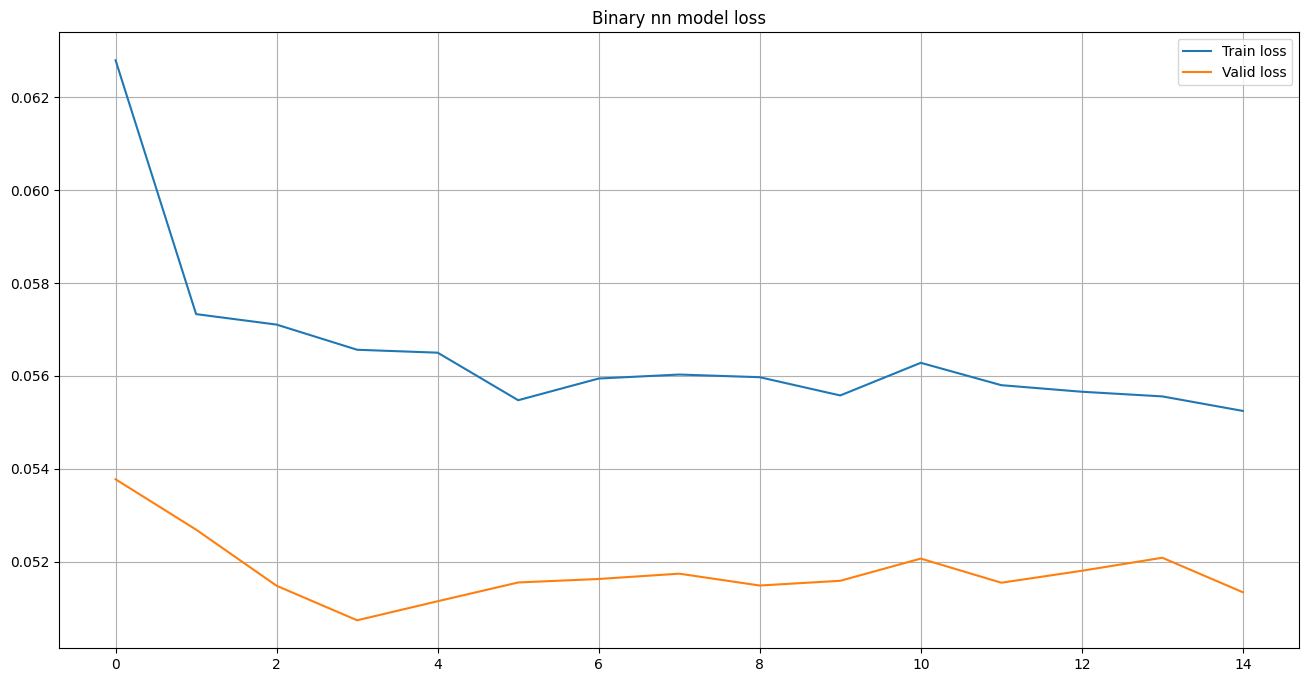

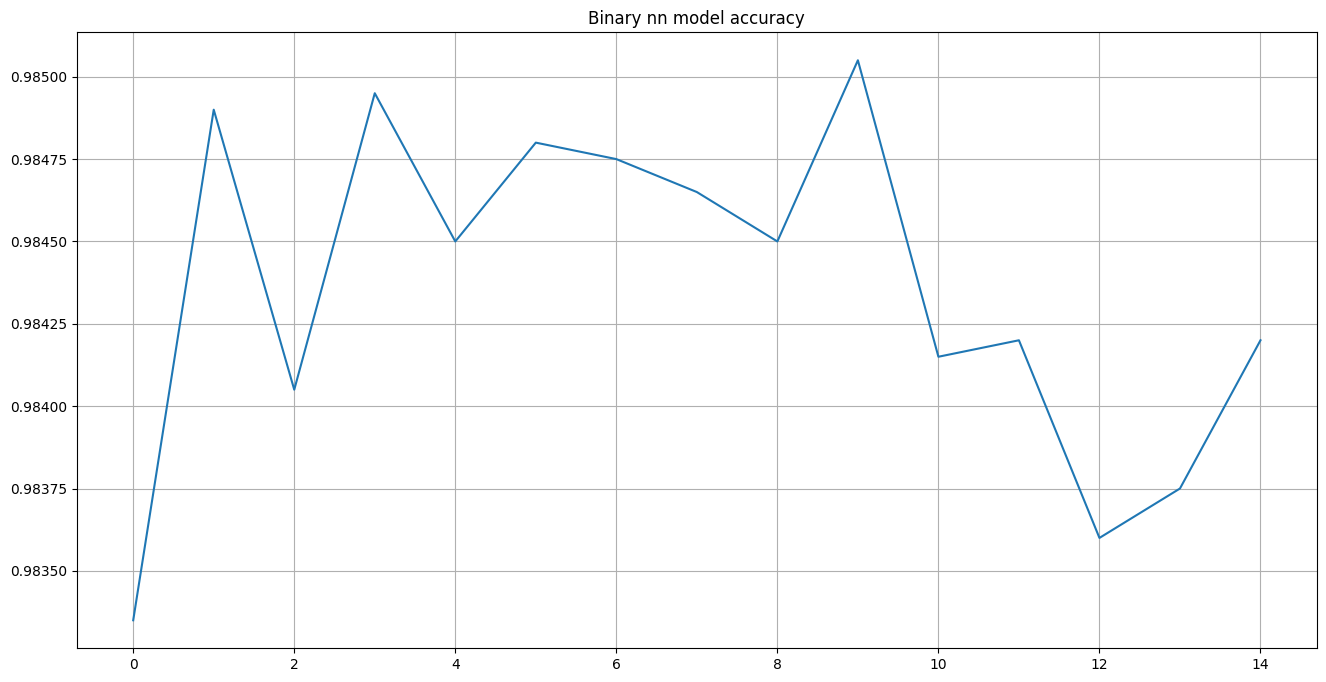

In [150]:
num_epochs = 15

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

for epoch in range(num_epochs):
    train_loss = train(first_model)

    valid_loss, valid_accuracy = evaluate(first_model, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)
    
    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'Binary nn model')

In [ ]:
first_model.eval()
for x, y in (valid_loader):
    with torch.no_grad():
        output = first_model(x[0])
        print(output)
        pred_prob = output.item()
        predicted = (output > 0.5).float()
        print(predicted)
        print(y[0])
        break